<a href="https://colab.research.google.com/github/GOPIKA-S-S/LAB9/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.DATA VISUALIZATION

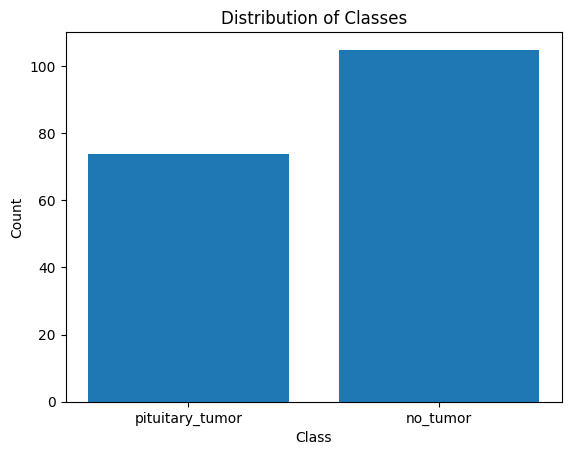

In [14]:
import os
import matplotlib.pyplot as plt

dataset_dir = "/content/drive/MyDrive/archive (5)/Testing"


class_counts = {}
classes = ["pituitary_tumor", "no_tumor"]
for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    file_count = len(os.listdir(class_dir))
    class_counts[class_name] = file_count

# Plot the class distribution
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Distribution of Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


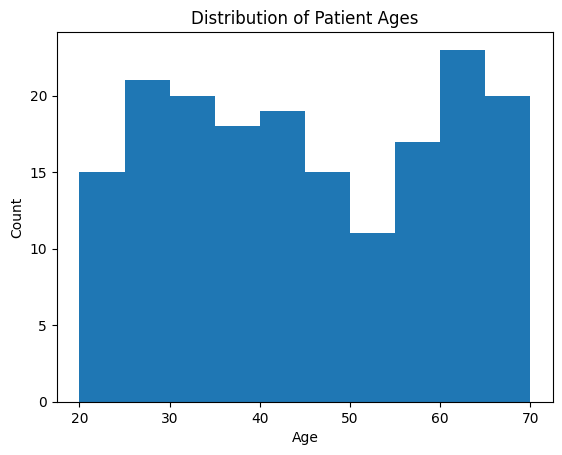

In [21]:
import os
import random
import matplotlib.pyplot as plt


dataset_dir = "/content/drive/MyDrive/archive (5)/Testing"


tumor_dir = os.path.join(dataset_dir, "pituitary_tumor")
non_tumor_dir = os.path.join(dataset_dir, "no_tumor")
tumor_images = os.listdir(tumor_dir)
non_tumor_images = os.listdir(non_tumor_dir)

random.seed(42)
ages = [random.randint(20, 70) for _ in range(len(tumor_images) + len(non_tumor_images))]

# Plot the distribution of patient ages
plt.hist(ages, bins=10)
plt.title("Distribution of Patient Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()



DATA PREPROCESSING

In [3]:
import os
import cv2

path = '/content/drive/MyDrive/archive (5)/Training'
classes = {'no_tumor': 0, 'pituitary_tumor': 1}
X = []
Y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])


In [4]:
X = np.array(X)
Y = np.array(Y)

In [5]:
pd.Series(Y).value_counts()

1    837
0    415
dtype: int64

In [6]:
X_updated = X.reshape(len(X), -1)

In [ ]:
X.shape, X_updated.shape

((1252, 200, 200), (1252, 40000))

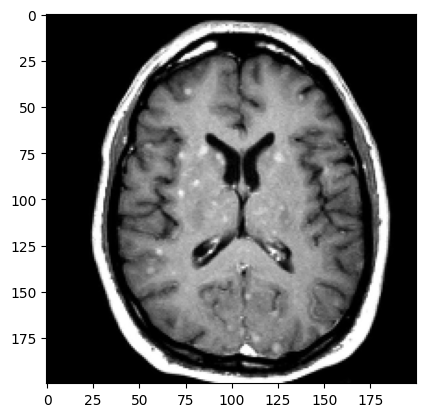

In [ ]:
plt.imshow(X[0], cmap='gray')

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1252, 40000)

MODEL BUILDING AND TRAINING

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((1001, 40000), (251, 40000))

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [ ]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9920079920079921
Testing Score: 0.9681274900398407


PREDICTION

In [ ]:
pred = sv.predict(xtest)

In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 32,  38,  66, 126, 159, 162, 166, 195]),)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[81],ytest[81])

Total Misclassified Samples:  8
0 0


In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

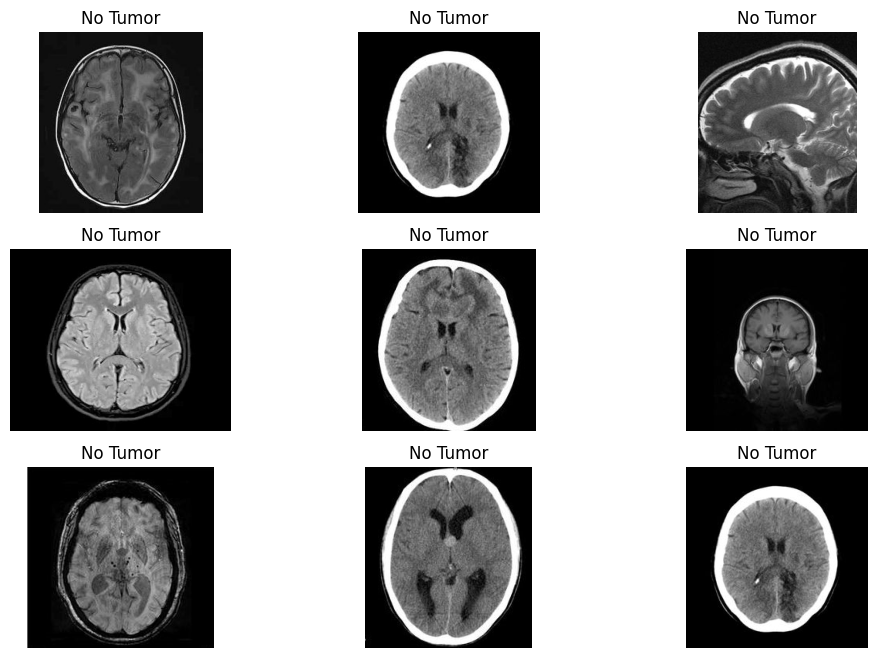

In [ ]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/archive (5)/Testing/no_tumor'
for i in os.listdir(path)[:9]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(3,3,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f"Fail to load image:{i}")
    plt.show()

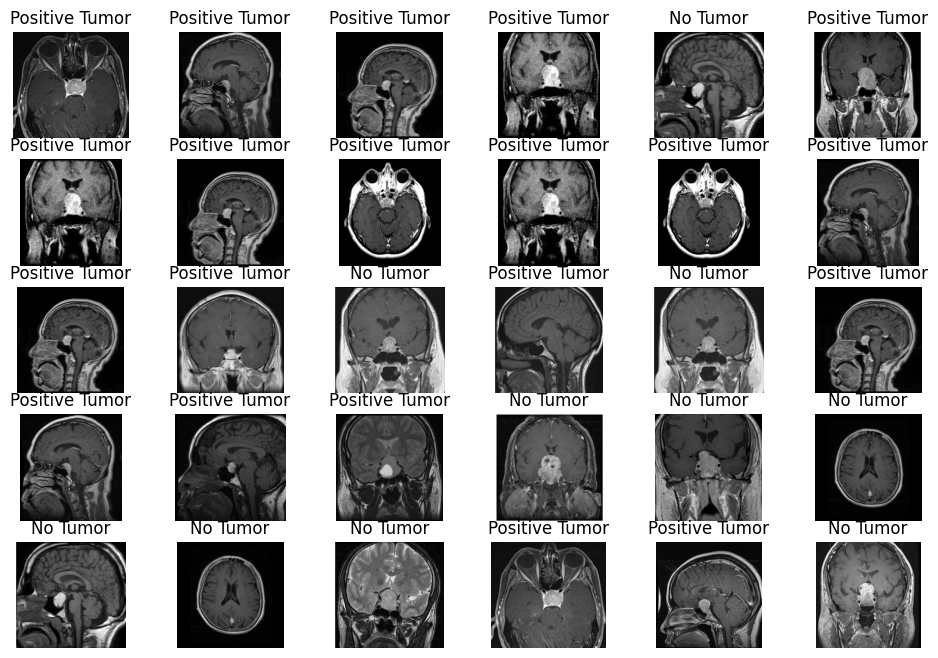

In [ ]:
plt.figure(figsize=(12,8))
c=1
path='/content/drive/MyDrive/archive (5)/Testing/pituitary_tumor'
for i in os.listdir(path)[:30]:
  img=cv2.imread(os.path.join(path,i),0)
  if img is not None:
    p=sv.predict(cv2.resize(img,(200,200)).reshape(1,-1)/255)
    plt.subplot(5,6,c)
    plt.title(dec.get(p[0],'UnKnown'))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1
  else:
    print(f'Failed to Load Image:{i}')
    plt.show()